# Week 1 Data Vis Tutorial (Python)

In this tutorial, you will learn the basics on how to load data and do simple plots using **Python**.

When you download this notebook, save it **together with the two .csv files**!

Now, to load the data files, we will use a **Python Module** calles *Pandas*, which simulates data frames as used in R and spreadsheets in Excel/SPSS/Stata/etc. Run the following cell (i.e. press play) to import this module

In [1]:
import pandas as pd

Now to load both files into *Pandas Data Frames*, run the following cells

In [2]:
temp = pd.read_csv('temp.csv')

In [3]:
pirates = pd.read_csv('pirates.csv')

You can see the contents of the two variables by **writing the name** (if you use the `print` function, they won't appear as neat as in the following cells)

In [4]:
temp

,Year,Global Average Temperature (Celsius)
0,1820,14.25
1,1860,14.27
2,1880,14.60
3,1920,14.90
4,1940,15.26
5,1980,15.52
6,2000,15.99


In [5]:
pirates

,Year,Number of Pirates (Approximate)
0,1820,35000
1,1860,45000
2,1880,20000
3,1920,15000
4,1940,5000
5,1980,400
6,2000,17


Given that we have two tables with the same amount of rows (but particularly the *same* year for each data entry), we can create a single data frame with all the data on it!

We will see many ways to do this later on during the module, but for the time being, we will **concatenate** the colums we need into a variable calles `df`:

In [6]:
df = pd.concat([temp, pirates], axis=1)
df

,Year,Global Average Temperature (Celsius),Year,Number of Pirates (Approximate)
0,1820,14.25,1820,35000
1,1860,14.27,1860,45000
2,1880,14.60,1880,20000
3,1920,14.90,1920,15000
4,1940,15.26,1940,5000
5,1980,15.52,1980,400
6,2000,15.99,2000,17


Unfortunately, the `Year` column has been duplicated! This can be avoided through several other operations, but for now on we will simply **drop duplicates** with a built-in Pandas function:

In [7]:
df = df.loc[:,~df.columns.duplicated()]
df

,Year,Global Average Temperature (Celsius),Number of Pirates (Approximate)
0,1820,14.25,35000
1,1860,14.27,45000
2,1880,14.60,20000
3,1920,14.90,15000
4,1940,15.26,5000
5,1980,15.52,400
6,2000,15.99,17


Now it's time to plot! Firstly, we will import the **Matplotlib** module, which allows us to draw plots easily:

In [8]:
import matplotlib.pyplot as plt

Then, we will define a *scatterplot* with the pirates in the x axis, the temperature in the y axis

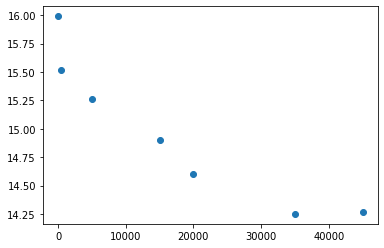

In [9]:
plt.scatter(df['Number of Pirates (Approximate)'], df['Global Average Temperature (Celsius)'])

The difference between this plot and the first Pastafarian one is that, if the year is not considered, then Python (and almost any other plotting tool) will sort the points throughout the x-axis and not by year.

This is because, in reality, the first Pastafarian plot is more like a "bar chart" where the number of pirates act as discrete categories ordered by year, and the temperature is the value on the y axis!

Therefore, we need to create a plot that mimics this design:

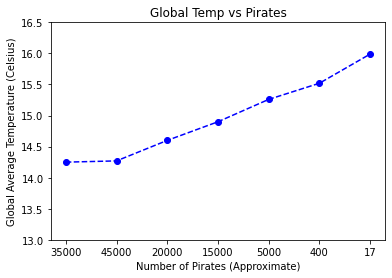

In [23]:
# First we convert the pirate data into strings so that matplotlib doesn't want to sort them
xaxis = [str(i) for i in df['Number of Pirates (Approximate)']]
plt.plot(xaxis,df['Global Average Temperature (Celsius)'],'--bo')
plt.title('Global Temp vs Pirates')
plt.xlabel('Number of Pirates (Approximate)')
plt.ylabel('Global Average Temperature (Celsius)')
plt.ylim(13,16.5)
plt.show()

**BONUS: CAN YOU ADD THE YEARS ON TOP OF EACH DOT?**

In [11]:
## Use this cell for your code


To plot the second version of the Pastafarian plot (i.e. the two lines), we can use Matplotliib as well:

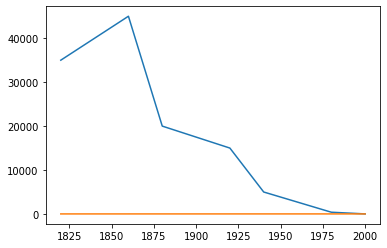

In [12]:
fig = plt.figure()
ax = plt.axes()
ax.plot(df['Year'], df['Number of Pirates (Approximate)'])
ax.plot(df['Year'], df['Global Average Temperature (Celsius)'])

Once again, there are major differences between our plot and the second Pastafarian one! The main issue now is that the *scale* of the pirate data is vastly different to the temperature one, and thus, the slope in the temperature data cannot be appreciated!

We need to specify that we want both plots drawn with different scales in the same plotting space (something that I highly discourage, we will see why later in this module!)

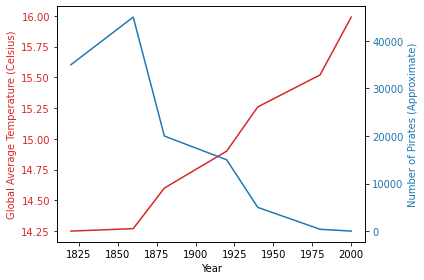

In [13]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Average Temperature (Celsius)', color=color)
ax1.plot(df['Year'], df['Global Average Temperature (Celsius)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of Pirates (Approximate)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Year'], df['Number of Pirates (Approximate)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()